In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


gdf = gpd.read_file("C:/Users/Yoanna/Downloads/utm_centroids_with_distance116.gpkg")

### Check what percentage of people have to walk a distance greater than 1500 metres to a drugstore in Salzburg

In [6]:
new_gpkg_path = "C:/Users/Yoanna/Downloads/utm_centroids_with_distance116.gpkg"
gdf = gpd.read_file(new_gpkg_path)

# Filter data for people who need to walk more than 1500 meters
people_above_1500m = gdf[gdf['adjusted_ex_distance'] > 1500]

# Sum the distributed population for these people
total_population_above_1500m = people_above_1500m['distributed_population'].sum()

# Sum the total distributed population
total_population = gdf['distributed_population'].sum()

# Calculate the percentage of the population who need to walk more than 1500 meters
percentage_above_1500m = (total_population_above_1500m / total_population) * 100

# Display the result
print(f"{percentage_above_1500m:.2f}% of people need to walk more than 1500 meters to reach a drugstore.")


20.31% of people need to walk more than 1500 meters to reach a drugstore.


#### Check the number of residents and their distance walking over 1500 meters

Number of people who need to walk more than 1500 meters before new drugstores: 32076.0


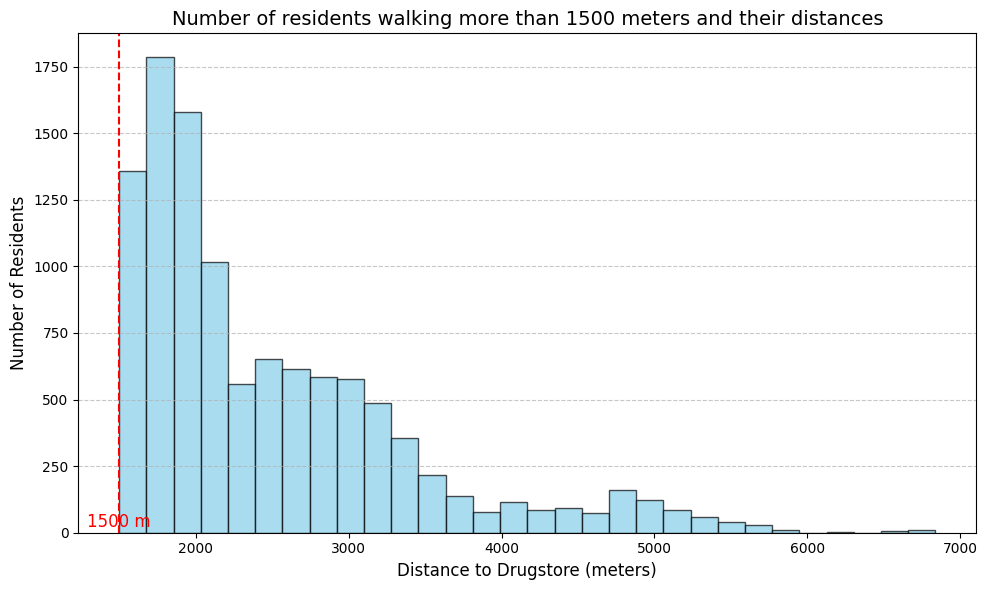

In [4]:
import matplotlib.pyplot as plt

# 1. Number of people who must walk more than 1500 meters before new drugstores are opened
over_1500_before = gdf[gdf['adjusted_ex_distance'] > 1500]
num_over_1500_before = over_1500_before['distributed_population'].sum()

print(f"Number of people who need to walk more than 1500 meters before new drugstores: {num_over_1500_before}")

# 2. Plot histogram of distances for these people
plt.figure(figsize=(10, 6))

# Histogram of walking distances before building new drugstores
plt.hist(over_1500_before['adjusted_ex_distance'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical line at 1500 meters threshold
plt.axvline(x=1500, color='red', linestyle='--')

# Add label '1500' under x-axis at the vertical line
plt.text(1500, plt.ylim()[0] + 5, '1500 m', color='red', fontsize=12, ha='center', va='bottom')

# Plot settings
plt.title('Number of residents walking more than 1500 meters and their distances', fontsize=14)
plt.xlabel('Distance to Drugstore (meters)', fontsize=12)
plt.ylabel('Number of Residents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot with tight layout
plt.tight_layout()
plt.show()
